In [1]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
from numpy.linalg import matrix_power                  # This is to raise matrices to powers
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
import sympy as sp

In [2]:
sys.path.append('../External_Functions')                  # Add the folder with the functions to the path
from MyFunctions import hist_create, matplotlib_plotparameters, bins_create,chi2_prob
matplotlib_plotparameters()                             # Set the plot parameters to something nice
from ExternalFunctions import Chi2Regression, nice_string_output, add_text_to_ax

# 1.1


In [3]:
fraction_easy = stats.norm.cdf(65, loc=50, scale=20) - stats.norm.cdf(55, loc=50, scale=20)
print(fraction_easy)

0.17466632194020804


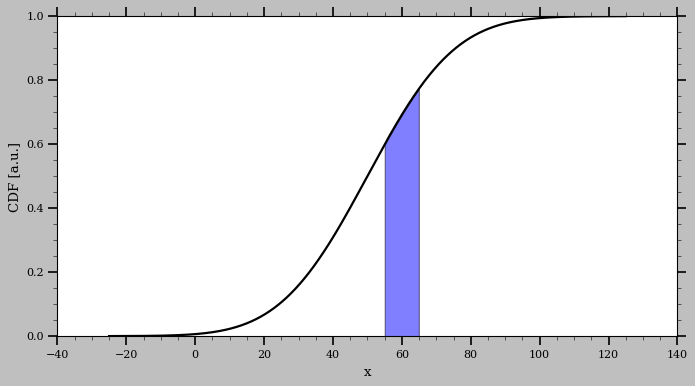

In [4]:
x= np.linspace(-25,125,1000)
fig = plt.figure(figsize=(10,5))
plt.plot(x, stats.norm.cdf(x, loc=50, scale=20),c='k')
plt.fill_between(x, stats.norm.cdf(x, loc=50, scale=20), where=(x>55) & (x<65),alpha=0.5)
plt.xlabel('x')
plt.ylabel('CDF [a.u.]')



plt.show()
fig.savefig('Figures/Gaussian_area.png', dpi=500)

In [5]:
r = np.random
r.seed(50)

def gaussian(x,mu,sigma,N):
    return  N*stats.norm.pdf(x,mu,sigma)

In [6]:
# Calculating the uncertainty of the mean if 120 measurments are taken with a standard deviation of 20 and a mean of 50

N = 120
sigma = 20
mean = 50
sigma_mean = sigma/np.sqrt(N)
print(sigma_mean)

1.8257418583505538


In [56]:
means = [mean, mean]
sigmas = [sigma, sigma]
ndata = 100000
corr = 0.6
var = np.array([[sigmas[0]**2, sigmas[0]*sigmas[1]*corr], 
                [sigmas[0]*sigmas[1]*corr, sigmas[1]**2]])

In [57]:
corr_data = np.random.multivariate_normal(means, var, size=ndata)

Text(0, 0.5, 'B')

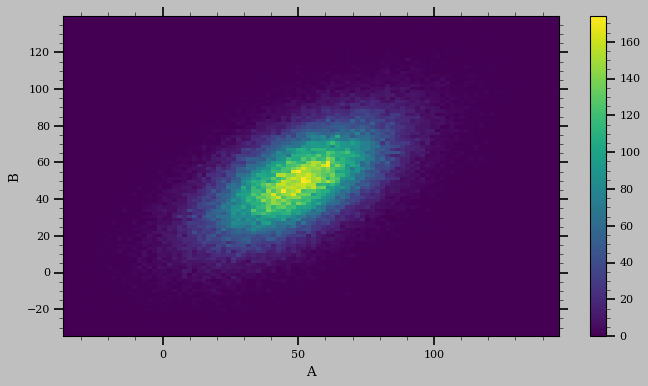

In [58]:
fig = plt.figure(figsize=(10,5))
#plot 2d histogram
plt.hist2d(corr_data[:,0], corr_data[:,1], bins=100,cmap = 'viridis');

#Colorbar
cbar = plt.colorbar()

plt.xlabel('A')
plt.ylabel('B')


Text(0, 0.5, 'Counts')

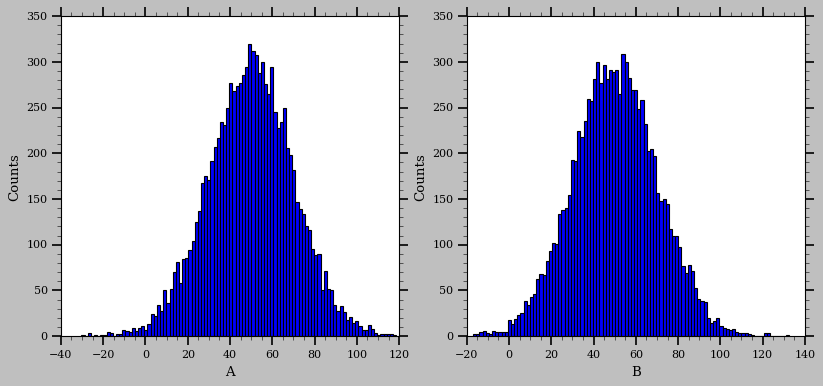

In [18]:
# plot the 2 1d histograms
fig1, ax1 = plt.subplots(1, 2, figsize=(12,5))
ax1[0].hist(corr_data[:,0], bins=100);
ax1[0].set_xlabel('A')
ax1[0].set_ylabel('Counts')

ax1[1].hist(corr_data[:,1], bins=100);
ax1[1].set_xlabel('B')
ax1[1].set_ylabel('Counts')


In [34]:
one_test = stats.norm.sf(60, loc=50, scale=20)
print(stats.norm.sf(60, loc=50, scale=20))

print(one_test*one_test*1/(1-0.6*one_test))

# Calculating the of both tests scoring more than 60 when the data is correlated by 0.6
two_tests = (one_test)*one_test
print(two_tests)


0.3085375387259869
0.11682174991641367
0.09519541280308985


# 1.2

The probability of 11 or more successes in 20 trials is:  0.12752124614721666


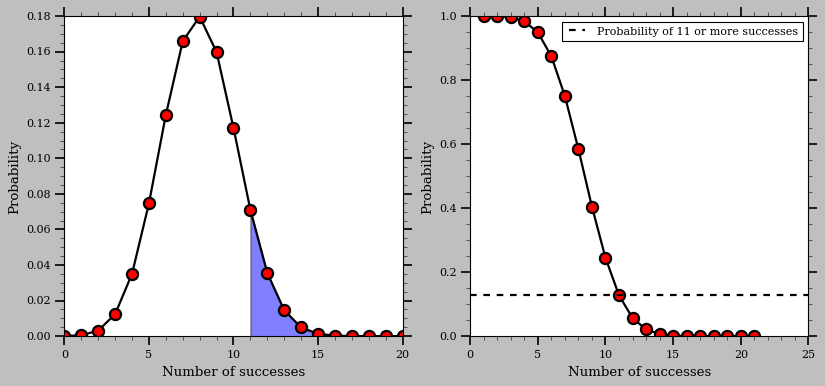

In [54]:
test = np.arange(0,21,1)

binomial = stats.binom.pmf(test, 20, 0.4)

binom = stats.binom.sf(10, 20, 0.4)


print('The probability of 11 or more successes in 20 trials is: ', binom)

fig2, ax2 = plt.subplots(1, 2, figsize=(12,5))

ax2[0].plot(test, binomial, 'o-',color='k')
ax2[0].fill_between(test, binomial, where=(test>10),alpha=0.5)
ax2[0].set_xlabel('Number of successes')
ax2[0].set_ylabel('Probability')

ax2[1].plot(test+1, stats.binom.sf(test,20,0.4), 'o-',color='k')
#plot horizontal line at binom
ax2[1].axhline(binom, color='k', linestyle='--', label='Probability of 11 or more successes')
ax2[1].set_xlabel('Number of successes')
ax2[1].set_ylabel('Probability')
ax2[1].legend(fontsize = 10)

fig2.savefig('Figures/Binomial.png', dpi=500)